# Modelo basado en capas convolucionales para clasificación de dígitos

 Modelo preentrenado (formato .h5):

In [2]:
import requests

url = "https://huggingface.co/spaces/ayaanzaveri/mnist/resolve/main/mnist-model.h5"
r = requests.get(url)
with open("mnist_model.h5", "wb") as f:
    f.write(r.content)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


Usar el modelo descargado

In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Cargar el modelo preentrenado
model = load_model("mnist_model.h5")

# Carga el modelo con las metricas correctas

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

c:\Users\mige1\miniconda3\envs\kernel\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


c:\Users\mige1\miniconda3\envs\kernel\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mige1\miniconda3\envs\kernel\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9926 - loss: 0.0355
Precisión en el conjunto de prueba: 0.9934999942779541


Realizar una predicción

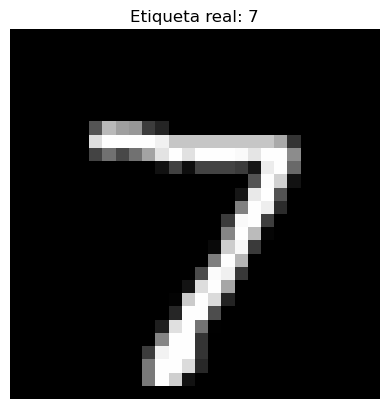

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Predicción del modelo: 7


In [2]:

idx = 0  # Cambia este índice para probar otras imágenes
img = x_test[idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Etiqueta real: {y_test[idx]}")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(img, axis=0))
print("Predicción del modelo:", np.argmax(prediction))

# Para hacer

1. Mostrar los valores y visualizar al menos 10 kernels del modelo pre-entrenado
2. Mostrar las salidas obtenidas al aplicar la convolución de una imagen con los kernels del ejercicio 1.
3. Calcular las predicciones de al menos 10 imágenes propias (adjuntar evidencia del proceso de adquisición de imágenes). Aplicar y explicar el tratamiento de imágenes necesario para adecuar los datos de entrada al modelo.
4. Repetir el ejercicio 2 con al menos una de las imágenes del ejercicio 3.

**Punto 1**

Shape de los kernels: (3, 3, 1, 64)


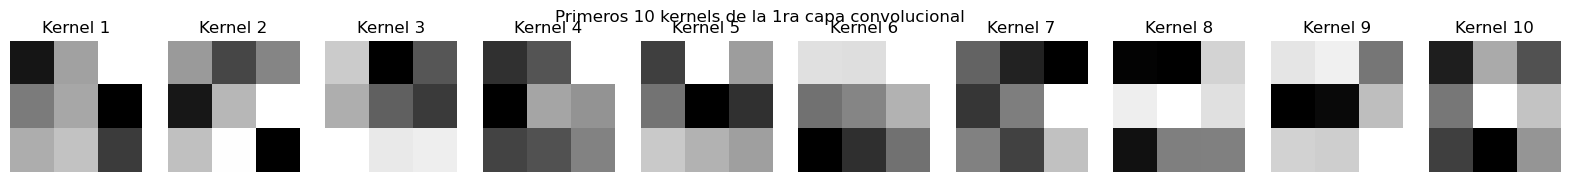

Valores del Kernel 1:
 [[-0.12700336  0.06122914  0.18749826]
 [ 0.00937727  0.06842199 -0.15611908]
 [ 0.07726777  0.1055401  -0.07614024]] 

Valores del Kernel 2:
 [[-0.00760545 -0.09749123 -0.0297416 ]
 [-0.14701729  0.0235094   0.10060543]
 [ 0.03251523  0.09855077 -0.17245239]] 

Valores del Kernel 3:
 [[ 0.07023826 -0.21103628 -0.09095965]
 [ 0.02933992 -0.07835605 -0.1302393 ]
 [ 0.14252186  0.11110964  0.11837369]] 

Valores del Kernel 4:
 [[-0.21196793 -0.13741313  0.2216292 ]
 [-0.31462792  0.03304299 -0.00644098]
 [-0.1741988  -0.14471729 -0.04228156]] 

Valores del Kernel 5:
 [[-0.11149041  0.15514414  0.01868065]
 [-0.03872406 -0.19877903 -0.13155748]
 [ 0.07934779  0.04774173  0.02208661]] 

Valores del Kernel 6:
 [[ 0.1470435   0.14372769  0.19879644]
 [-0.03609898 -0.00439419  0.0708851 ]
 [-0.22566178 -0.14623997 -0.03570205]] 

Valores del Kernel 7:
 [[ 0.00473779 -0.10265329 -0.16014414]
 [-0.07055251  0.04871018  0.26408508]
 [ 0.05364871 -0.05179111  0.15994029]] 


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Carga el modelo preentrenado (ajusta la ruta si es necesario)
model = tf.keras.models.load_model("mnist_model.h5")

# Obtén la primera capa convolucional
first_conv_layer = None
for layer in model.layers:
    if 'conv' in layer.name:
        first_conv_layer = layer
        break

kernels = first_conv_layer.get_weights()[0]  # shape: (kernel_h, kernel_w, in_channels, out_channels)
print("Shape de los kernels:", kernels.shape)

# Visualiza los primeros 10 kernels del primer canal de entrada
fig, axes = plt.subplots(1, 10, figsize=(20,2))
for i in range(10):
    kernel = kernels[:, :, 0, i]  # Primer canal de entrada, kernel i
    axes[i].imshow(kernel, cmap='gray')
    axes[i].set_title(f'Kernel {i+1}')
    axes[i].axis('off')
plt.suptitle("Primeros 10 kernels de la 1ra capa convolucional")
plt.show()

# (Opcional) Mostrar los valores numéricos de los primeros kernels
for i in range(10):
    print(f"Valores del Kernel {i+1}:\n", kernels[:,:,0,i], "\n")


**Punto 2**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


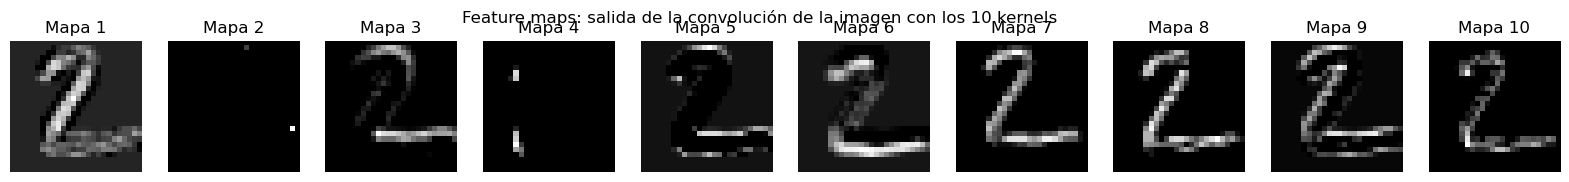

In [10]:
from tensorflow.keras import Model

# Carga una imagen de prueba de MNIST
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
img = x_test[1]  # Cambia el índice si quieres otra imagen
img_norm = img / 255.0
img_input = np.expand_dims(np.expand_dims(img_norm, axis=0), axis=-1)

# Encuentra la primera capa convolucional y la capa de entrada real
first_conv_layer = None
for layer in model.layers:
    if 'conv' in layer.name:
        first_conv_layer = layer
        break

input_layer = model.layers[0].input  # OJO: input real de la primera capa

model_cut = Model(inputs=input_layer, outputs=first_conv_layer.output)
feature_maps = model_cut.predict(img_input)

# Visualiza los 10 primeros feature maps (salidas de la convolución)
fig, axes = plt.subplots(1, 10, figsize=(20,2))
for i in range(10):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Mapa {i+1}')
    axes[i].axis('off')
plt.suptitle("Feature maps: salida de la convolución de la imagen con los 10 kernels")
plt.show()

